# Determine the optimal latency OLS coefficient estimation algorithm

In [13]:
import time

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# Initialize latency object
runtime: np.ndarray = np.empty(shape=(1_000, 4))

# Generate a distribution of coefficient calcualtion latencies for each method
for i in range(1_000):

    # Create synthetic data that is large enough to explore the limiting behavior of each method's latency
    y = np.random.randn(20_000, 1)
    X = np.random.randn(20_000, 100)

    # Calculate method 0's latency
    start_time = time.time()
    coefficients_0 = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))  
    runtime[i, 0] = time.time() - start_time
    
    # Calculate method 1's latency
    start_time = time.time()
    coefficients_1 = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)), y)
    runtime[i, 1] = time.time() - start_time

    # Calculate method 2's latency
    start_time = time.time()
    coefficients_2 = np.linalg.inv(X.T @ X) @ X.T @ y
    runtime[i, 2] = time.time() - start_time

    # Calculate method 3's latency
    start_time = time.time()
    coefficients_3 = np.linalg.solve(X.T @ X, X.T @ y)
    runtime[i, 3] = time.time() - start_time

runtime: pd.DataFrame = pd.DataFrame(runtime)

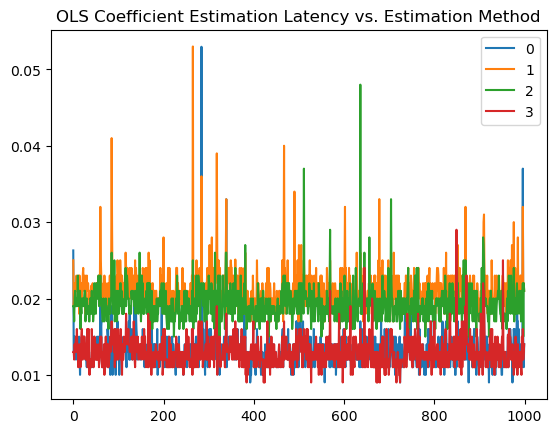

In [14]:
runtime.plot(title="OLS Coefficient Estimation Latency vs. Estimation Method")
plt.show()

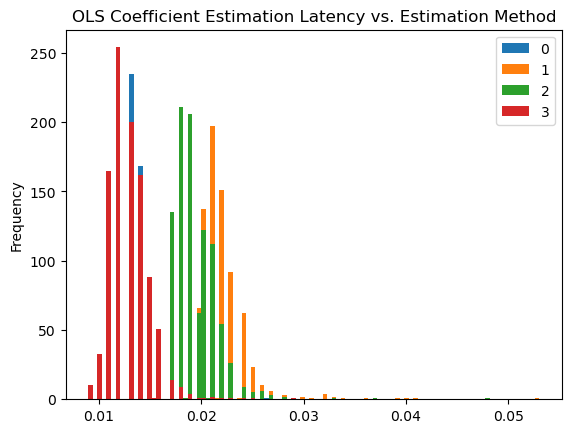

In [15]:
runtime.plot(kind="hist",  bins=100, title="OLS Coefficient Estimation Latency vs. Estimation Method")
plt.show()

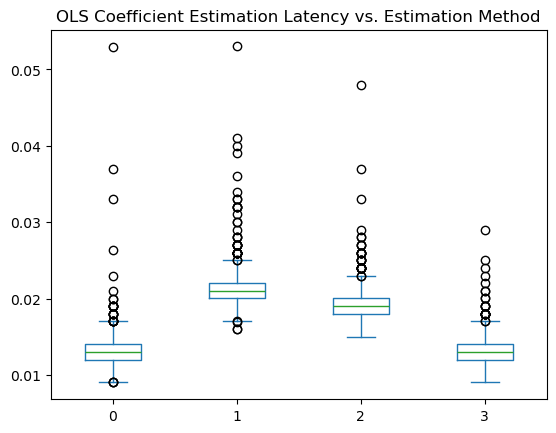

In [16]:
runtime.plot(kind="box", title="OLS Coefficient Estimation Latency vs. Estimation Method")
plt.show()